# <p style='text-align: center;'> Gradient Boosting Classification in Machine Learning </p>

- Gradient Boosting Machine (GBM) is one of the most popular forward learning ensemble methods in machine learning. It is a powerful technique for building predictive models for regression and classification tasks.


- GBM helps us to get a predictive model in form of an ensemble of weak prediction models such as decision trees. Whenever a decision tree performs as a weak learner then the resulting algorithm is called gradient-boosted trees.


- It enables us to combine the predictions from various learner models and build a final predictive model having the correct prediction.


- But here one question may arise if we are applying the same algorithm then how multiple decision trees can give better predictions than a single decision tree? Moreover, how does each decision tree capture different information from the same data?

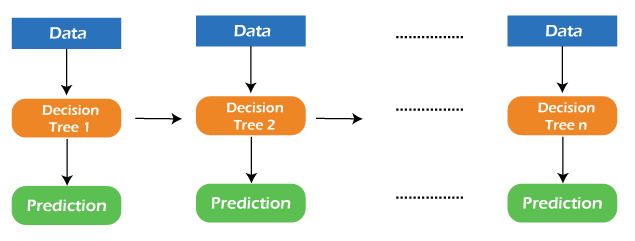


- So, the answer to these questions is that a different subset of features is taken by the nodes of each decision tree to select the best split. It means, that each tree behaves differently, and hence captures different signals from the same data.

### How do GBM works ?
- Generally, most supervised learning algorithms are based on a single predictive model such as linear regression, penalized regression model, decision trees, etc. But there are some supervised algorithms in ML that depend on a combination of various models together through the ensemble. In other words, when multiple base models contribute their predictions, an average of all predictions is adapted by boosting algorithms.


<b> Gradient Boosting has three main components:
    
   1. Loss function
   2. Weak learners
   3. Additive model
    
    
Let's understand these three elements in detail:

<b> 1. Loss function:
    
- The role of the loss function is to estimate how good the model is at making predictions with the given data. This could vary depending on the problem at hand.
    
    
- For example, if we're trying to predict the weight of a person depending on some input variables (a regression problem), then the loss function would be something that helps us find the difference between the predicted weights and the observed weights. On the other hand, if we're trying to categorize if a person will like a certain movie based on their personality, we'll require a loss function that helps us understand how accurate our model is at classifying people who did or didn't like certain movies.
    
    
<b> 2. Weak Learner:
    
- A weak learner is one that classifies our data but does so poorly, perhaps no better than random guessing. In other words, it has a high error rate. These are typically decision trees (also called decision stumps, because they are less complicated than typical decision trees).
    
    
<b> 3. Additive Model:
    
- Additive Model - This is the iterative and sequential approach of adding the trees (weak learners) one step at a time. After each iteration, we need to be closer to our final model. In other words, each iteration should reduce the value of our loss function.

### An Intuitive Understanding: Visualizing Gradient Boost
Let's start with looking at one of the most common binary classification machine learning problems. It aims at predicting the fate of the passengers on Titanic based on a few features: their age, gender, etc. We will take only a subset of the dataset and choose certain columns, for convenience. Our dataset looks something like this:

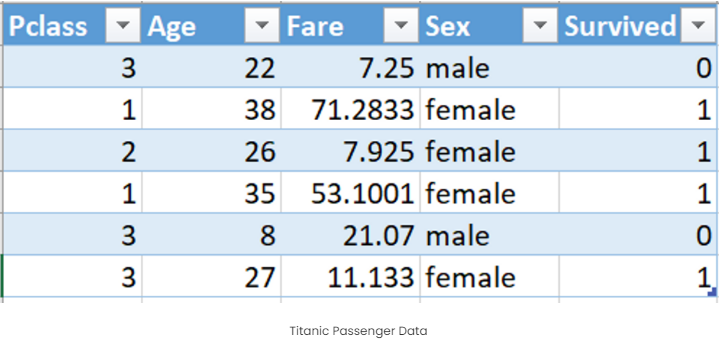


- Pclass, or Passenger Class, is categorical: 1, 2, or 3.
- Age is the age of the passenger when they were on the Titanic.
- Fare is the Passenger Fare.
- Sex is the gender of the person.
- Survived refers to whether or not the person survived the crash; 0 if they did not, 1 if they did.



<b> Now let's look at how the Gradient Boosting algorithm solves this problem.
We start with one leaf node that predicts the initial value for every individual passenger. For a classification problem, it will be the log(odds) of the target value. log(odds) is the equivalent of average in a classification problem. Since four passengers in our case survived, and two did not survive, log(odds) that a passenger survived would be:
    
    
    log(odds) = log (Survived / NotSurvived)
    
    log(odds) = log (4/2) = 0.7
    
    
This becomes our initial leaf, i.e. (Initial Leaf Node)=0.7
    
    
Where log(odds) are the ratio of the probability of success to failure. 
    
    
The easiest way to use the log(odds) for classification is to convert it to a probability. To do so, we'll use this formula:
    
                       e^log(odds)
     P(Surviving) = -----------------
                     1 + e^log(odds)
    
    
<b> Note: Please bear in mind that we have rounded off everything to one decimal place here, and hence the log(odds) and probability are the same, which may not be the case always.
    
    
If the probability of surviving is greater than 0.5, then we first classify everyone in the training dataset as survivors. (0.5 is a common threshold used for classification decisions made based on probability; note that the threshold can easily be taken as something else.)
    
    
Now we need to calculate the Pseudo Residual, i.e, the difference between the observed value and the predicted value. Let us draw the residuals on a graph.
    
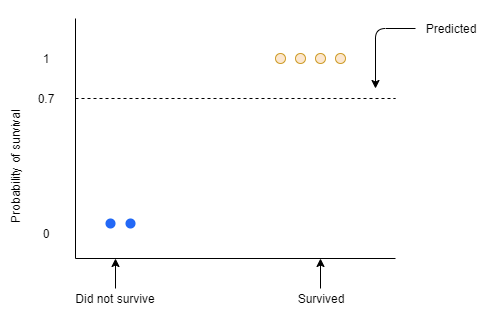
    
  
The blue and the yellow dots are the observed values. The blue dots are the passengers who did not survive with the probability of 0 and the yellow dots are the passengers who survived with a probability of 1. The dotted line here represents the predicted probability which is 0.7
    
    
We need to find the residual which would be :
    
    Residual = Observed value - Predicted value 
    
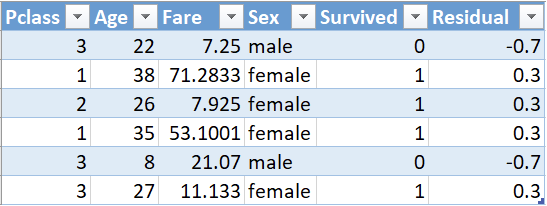
    
    
Here, 1 denotes Yes and 0 denotes No.

We will use this residual to get the next tree. It may seem absurd that we are considering the residual instead of the actual value, but we shall throw more light ahead. Now we will build a Tree, using likes Pclass, Age, Fare and Sex.

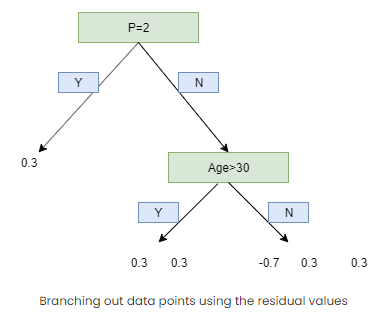


We use a limit of two leaves here to simplify our example, but in reality, Gradient Boost has a range between 8 leaves to 32 leaves.


Because of the limit on leaves, one leaf can have multiple values. Predictions are in terms of log(odds) but these leaves are derived from probability which cause disparity. So, we can't just add the single leaf we got earlier and this tree to get new predictions because they're derived from different sources. We have to use some kind of transformation. The most common form of transformation used in Gradient Boost for Classification is :

                        ∑ Residual
    -------------------------------------------------------
     ∑ [Previous Probability * (1 - Previous Probability)]
     
     
Where, The numerator in this equation is sum of residuals in that particular leaf. And the denominator is sum of (previous prediction probability for each residual ) * (1 - same previous prediction probability).


Let us put the formula into practice:


The first leaf has only one residual value that is 0.3, and since this is the first tree, the previous probability will be the value from the initial leaf, thus, same for all residuals. Hence,

            0.3
    ------------------- = 1.43
     [0.7 * (1 - 0.7)]
     
     
For the second leaf:


                    0.3 + 0.3
    --------------------------------------- = 4.29
     [0.7 * (1 - 0.7)] + [0.7 * (1 - 0.7)] 
     
      
Similarly, for the last leaf:  


                            -0.7 + 0.3 + 0.3
    ----------------------------------------------------------- = -0.16
     [0.7 * (1 - 0.7)] + [0.7 * (1 - 0.7)] + [0.7 * (1 - 0.7)]   
     
     
     
<b> Now the transformed tree looks like:

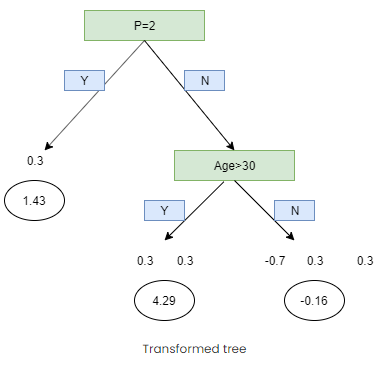
    
    
Now that we have transformed it, we can add our initial lead with our new tree with a learning rate.
    
    
    OldTree + LearningRate * NewTree
    
    
**Learning Rate** is used to scale the contribution from the new tree. This results in a small step in the right direction of prediction. Empirical evidence has proven that taking lots of small steps in the right direction results in better prediction with a testing dataset i.e the dataset that the model has never seen as compared to the perfect prediction in 1st step. Learning Rate is usually a small number like 0.1
    
    
We can now calculate new log(odds) prediction and hence a new probability.
    
    
For example, for the first passenger, Old Tree = 0.7. Learning Rate which remains the same for all records is equal to 0.1 and by scaling the new tree, we find its value to be -0.16. Hence, substituting in the formula we get:
    
    0.7 + (0.1 * (-0.16)) = 0.684
    
    
Similarly, we substitute and find the new log(odds) for each passenger and hence find the probability. Using the new probability, we will calculate the new residuals.

    
This process repeats until we have made the maximum number of trees specified or the residuals get super small.
    
   